In [32]:
import numpy as np
import plotly.graph_objects as go 
import pyrender 
import open3d as o3d
import trimesh

## Superquadrics

The surface of a basic superquadric is given by: 
$$ \vert x \vert^r + \vert y \vert^s + \vert z \vert^t = 1 ,$$

where $r, s$ and $t$ are positive real numbers that determine the main features of the superquadric:
 - $< 1$ : pointy octahedron
 - $= 1$: regular octahedron
 - $range(1, 2)$: blunt octahedron
 - $=2$ : sphere
 - $>2$ : cube modified to have rounded edges and corners
 
 We can scale these basic shapes as follows: 
 
 $$ \vert \frac{x}{A} \vert^r + \vert \frac{y}{B} \vert^s + \vert \frac{z}{C} \vert^t = 1 $$


In [22]:
def superquadric(epsilon, a):
    n = 50
    eta_max = np.pi / 2
    eta_min = -np.pi / 2
    w_max = np.pi
    w_min = -np.pi
    d_eta = (eta_max - eta_min) / n
    d_w = (w_max - w_min) / n
    [i,j] = np.meshgrid(range(n), range(n))
    
    eta = eta_min + i * d_eta
    w = w_min + j * d_w

    aux = lambda omega, m, func: np.dot(np.sign(func(omega)), np.power(np.abs(func(omega)), m)) 

    x = np.dot(a[0], np.dot(aux(eta, epsilon[0], np.cos), aux(w, epsilon[0], np.cos)))
    y = np.dot(a[1], np.dot(aux(eta, epsilon[1], np.cos), aux(w, epsilon[1], np.sin)))
    z = np.dot(a[2], aux(eta, epsilon[2], np.sin))
    
    return x,y,z

In [46]:
x,y,z = superquadric([50,5,15],[144,13,10])

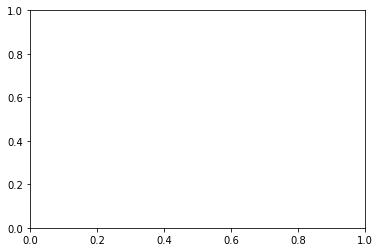

In [47]:
plt.gca()
fig = go.Figure(data=[go.Mesh3d(x=x, y=y,z=z, color='green', opacity=0.20)])
fig.show()

In [75]:
def fexp(x,p):
    """a different kind of exponentiation"""
    return (np.sign(x)*(np.abs(x)**p))

def tens_fld(A,B,C,P,Q):
    """this module plots superquadratic surfaces with the given parameters"""
    phi, theta = np.mgrid[0:np.pi:80j, 0:2*np.pi:80j]
    x       =A*(fexp(np.sin(phi),P)) *(fexp(np.cos(theta),Q))
    y       =B*(fexp(np.sin(phi),P)) *(fexp(np.sin(theta),Q))
    z       =C*(fexp(np.cos(phi),P))
    return x , y , z 

alpha = np.linspace(0, 4, 80)
beta = np.linspace(0, 4, 80)

x,y,z = tens_fld(1,1,1, alpha, beta)
tms = [x, y, z]
m = pyrender.Mesh.from_trimesh(tms)
print(x.shape, y.shape, z.shape)
fig = go.Figure(data=[go.Mesh3d(x=x, y=y,z=z, color='green', opacity=0.20)])
fig.show()

AttributeError: 'numpy.ndarray' object has no attribute 'vertices'

In [85]:
!pip install EPD

  Created wheel for EPD: filename=epd-2.3.21-cp37-cp37m-macosx_10_9_x86_64.whl size=17975 sha256=b949faf31052dc1fe504d71feb9408ee3514cbf81cc15f509bf4b8cdfeb4d109
  Stored in directory: /Users/yoni/Library/Caches/pip/wheels/9c/81/16/16ddcc1e7ab3bc65fbedda9505bba6ba8f1055f9c6253df1d0
Successfully built EPD


In [86]:

def fexp(x,p):
    """a different kind of exponentiation"""
    return (np.sign(x)*(np.abs(x)**p))

def tens_fld(A,B,C,P,Q):
    """this module plots superquadratic surfaces with the given parameters"""
    phi, theta = np.mgrid[0:np.pi:80j, 0:2*np.pi:80j]
    x       =A*(fexp(np.sin(phi),P)) *(fexp(np.cos(theta),Q))
    y       =B*(fexp(np.sin(phi),P)) *(fexp(np.sin(theta),Q))
    z       =C*(fexp(np.cos(phi),P))
    return x , y , z 


from enthought.traits.api import HasTraits, Range, Instance, \
                    on_trait_change
from enthought.traits.ui.api import View, Item, HGroup
from enthought.tvtk.pyface.scene_editor import SceneEditor
from enthought.mayavi.tools.mlab_scene_model import \
                    MlabSceneModel
from enthought.mayavi.core.ui.mayavi_scene import MayaviScene


class Visualization(HasTraits):
    alpha = Range(0.0, 4.0,  1.0/4)
    beta  = Range(0.0, 4.0,  1.0/4)
    scene      = Instance(MlabSceneModel, ())

    def __init__(self):
        # Do not forget to call the parent's __init__
        HasTraits.__init__(self)
        x, y, z, = tens_fld(1,1,1,self.beta, self.alpha)
        self.plot = self.scene.mlab.mesh(x, y, z, colormap='copper', representation='surface')

    @on_trait_change('beta,alpha')
    def update_plot(self):
        x, y, z, = tens_fld(1,1,1,self.beta, self.alpha)
        self.plot.mlab_source.set(x=x, y=y, z=z)


    # the layout of the dialog created
    view = View(Item('scene', editor=SceneEditor(scene_class=MayaviScene),
                    height=550, width=550, show_label=False),
                HGroup(
                        '_', 'beta', 'alpha',
                    ),
                )

visualization = Visualization()
visualization.configure_traits()



ModuleNotFoundError: No module named 'enthought'